# Project 9 DS metal and mining industry

## Formulation of the problem

### Apply knowledge to a Data Science challenge from the gold mining industry. The project was provided by the "X" company.

### Formulation of the problem
Prepare a machine learning model prototype. The company develops solutions for the efficient operation of industrial enterprises.
The model should predict the recovery rate of gold from gold ore. You have data with extraction and cleaning parameters at your disposal.
The model will help optimize production so as not to launch an enterprise with unprofitable characteristics.

### You need:
* Prepare data
* Conduct exploratory data analysis
* Build and train the model
* Check the model quality

### Step 0. Deep dive into Technological process

When the mined ore undergoes primary processing, a crushed mixture is obtained. It is sent for flotation (enrichment) and two-stage purification.

#### Let's describe each stage:
1. Flotation
A mixture of gold-bearing ore is fed into the flotation plant. After enrichment, a rough concentrate and “ore tailing” are obtained, that is, product residues with a low concentration of valuable metals.
The stability of this process is affected by the unstable and non-optimal physical and chemical state of the flotation pulp (a mixture of solid particles and liquid).
2. Cleaning
The crude concentrate goes through two purifications. The output is the final concentrate and new final ore tailings.

#### Description of data

##### Technological process
* Rougher feed - feedstock
* Rougher addit ions (or reagent additions) - flotation reagents: Xanthate, Sulphate, Depressant
* Xanthate - xanthate (promoter, or flotation activator);
* Sulphate - sulfate (in this production, sodium sulfide);
* Depressant - depressant (sodium silicate).
* Rougher process ("rough process") - flotation
* Rougher tailing
* Float banks - flotation unit
* Cleaner process - cleaning
* Rougher Au - crude gold concentrate
* Final Au - final gold concentrate


##### Stage parameters
* air amount — air volume
* fluid levels - fluid level
* feed size - feed granule size
* feed rate — feed rate


* Name of signs
** The name of the features should be:
** [stage].[parameter_type].[parameter_name]
** Example: rougher.input.feed_ag


* Possible values for block [stage]:
** rougher - flotation
** primary_cleaner - primary cleaning
** secondary_cleaner - secondary cleaning
** final - final characteristics


* Possible values for block [parameter_type]:
** input — raw material parameters
** output - product parameters
** state — parameters characterizing the current state of the stage
** calculation — calculated characteristics


* Efficiency calculation
** You need to simulate the process of recovering gold from gold ore.
** Enrichment efficiency is calculated by the formula

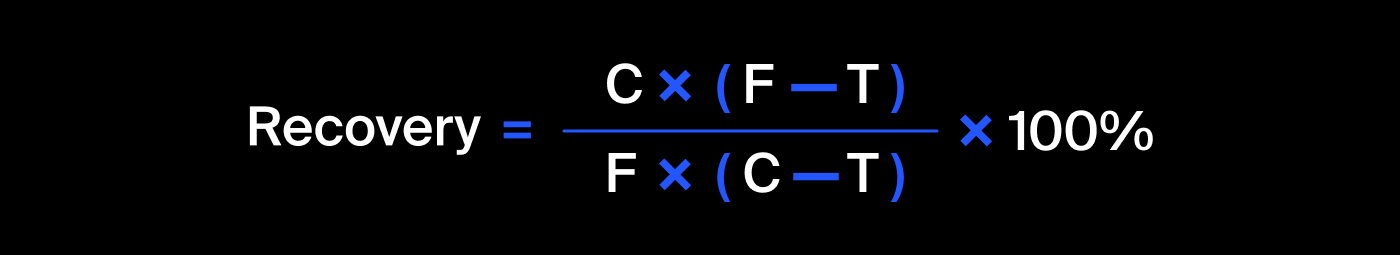

Where:
* C is the proportion of gold in the concentrate after flotation/refining
* F is the share of gold in the raw material/concentrate before flotation/refining
* T is the proportion of gold in ore tailings after flotation/cleaning

To predict the ratio is to find the proportion of gold in concentrates and ore tailings. Moreover, not only the final product is important, but also the rough concentrate.


##### Quality metric
* To solve the problem, we will use sMAPE (Symmetric Mean Absolute Percentage Error) metric.
* It is similar to MAE, but is expressed not in absolute terms, but in relative terms. It is symmetrical metric so It equally takes into account the scale of both the target feature and the prediction.

* The sMAPE metric is calculated like this:

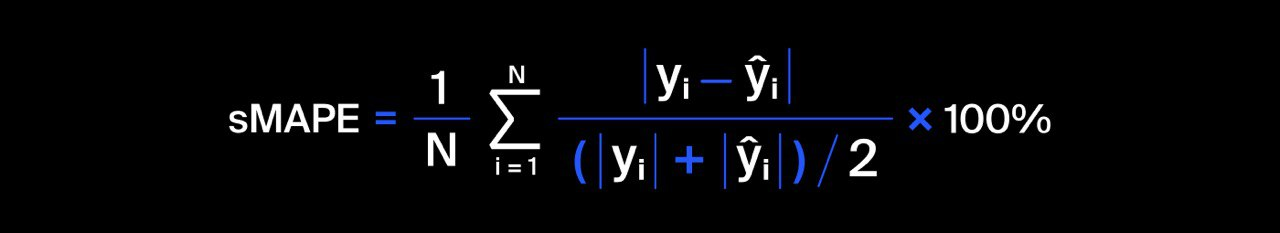

Designations:
* yi - The value of the target feature for the object with serial number i in the sample on which the quality is measured
* yi^ - Prediction value for the object with index i, for example, in the test set
* i - Number of objects in the sample
* sum - Summation over all objects in the sample (i varies from 1 to N)

You need to predict two quantities at once:
* rough concentrate enrichment efficiency rougher.output.recovery
* final.output.recovery concentration efficiency


The final metric consists of two values:

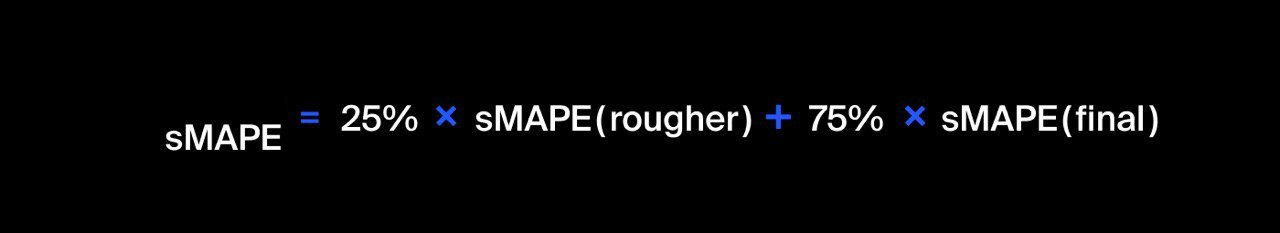

## Project description
The data is in three files:
* gold_recovery_train_new.csv - training data;
* gold_recovery_test_new.csv - test data;
* gold_recovery_full_new.csv - initial data.

The data is indexed by the date and time the information was received (the date attribute). Parameters adjacent in time are often similar. 

Some parameters are not available because they are measured and/or calculated much later. Because of this, the test set lacks some features that may be in the training set. Also, there are no target features in the test set. The initial dataset contains the training and test sets with all features.

You have raw data at your disposal: they were simply unloaded from storage. Before startnig to te a model, check them for correctness according to our instructions.

## Project implementation steps:

### Step 1. Prepare data
* 1.1 Open and check files
* 1.2. Check that the enrichment efficiency is calculated correctly. Calculate it on the training sample for the feature rougher.output.recovery. Find the MAE between your calculations and the feature value.
* 1.3. Analyze features that are not available in the test sample. What are these parameters? What type are they?
* 1.4. Perform data preprocessing.
### Step 2. Analyze the data
* 2.1. See how the concentration of metals (Au, Ag, Pb) changes at different stages of purification. Describe the findings.
* 2.2. Compare the size distributions of raw material granules on the training and test samples. If the distributions are very different from each other, the estimation of the model will be wrong.
* 2.3. Explore the total concentration of all substances at different stages: in raw materials, in roughing and final concentrates.
### Step 3. Make Models
* 3.1. Write a function to calculate the final sMAPE.
* 3.2. Train different models and evaluate their quality by cross-validation. Choose the best model and test it on a test set. Describe the findings.


## Step 1. Prepare the data
* 1.1. Open the files and check them.
* 1.2. Check that the enrichment efficiency is calculated correctly. Calculate it on the training sample for the feature rougher.output.recovery. Find the MAE between your calculations and the feature value. Describe the findings.
* 1.3. Analyze features that are not available in the test sample. What are these parameters? What type are they?
* 1.4. Perform data preprocessing.

### Step 1.1. Open the files and check them.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

# import methods
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# import models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import  DecisionTreeRegressor

RANDOM_STATE = "12345"

In [2]:
try:
    data_train = pd.read_csv("/Users/dmitry/Documents/Python DS/Modul 2/datasets_2_modul/gold_recovery_train_new.csv")
    data_test = pd.read_csv("/Users/dmitry/Documents/Python DS/Modul 2/datasets_2_modul/gold_recovery_test_new.csv")
    data_full = pd.read_csv("/Users/dmitry/Documents/Python DS/Modul 2/datasets_2_modul/gold_recovery_full_new.csv")
except:
    data_train = pd.read_csv("/datasets/gold_recovery_train_new.csv")
    data_test = pd.read_csv("/datasets/gold_recovery_test_new.csv")
    data_full = pd.read_csv("/datasets/gold_recovery_full_new.csv")
    
def show_parameters_df(data):
    data.info()
    
    display(data.describe())
    print("\n")
    data.columns
    display(data.head(35))

# Using a function to view data from a dataframe
def columns_info_from_df(df):
    for i in df.columns:
        
        print(i)
        df[i].hist(bins = 100)
       # df[i].plot(kind = "bar", figsize = (10,5))
        plt.xlabel(i)
        plt.ylabel("frequency")
        plt.title("Parameter Distribution Frequency  ")
        plt.show()
       
        print(data[i].unique())
        print(data[i].value_counts())

        print("\n")

        
show_parameters_df(data_train)
show_parameters_df(data_test)
show_parameters_df(data_full)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


### Step 1.2. Check that the enrichment efficiency is calculated correctly. Calculate it on the training sample for the feature rougher.output.recovery. Find the MAE between your calculations and the feature value. Describe the findings.

In [3]:
diferences_count = 0
diferences_sum = 0
recovery_rougher_calculated_series =[]

recovery_rougher_calculated = ((data_train["rougher.output.concentrate_au"] * (data_train["rougher.input.feed_au"] 
                            - data_train["rougher.output.tail_au"])) / (data_train["rougher.input.feed_au"]
                            * (data_train["rougher.output.concentrate_au"] - data_train["rougher.output.tail_au"])) 
                            * 100
                              )
delta_recovery = recovery_rougher_calculated - data_train["rougher.output.recovery"]

for i in delta_recovery:
    if  i != 0:
        diferences_sum += i
        diferences_count += 1
        

mae = mean_absolute_error(data_train["rougher.output.recovery"], recovery_rougher_calculated)

print("The number of values where the MAE score differs:", mae )
print("The number of values where the recovered score differs:", diferences_count/data_train["rougher.output.concentrate_au"]
      .count()
     )
print("What is the total discrepancy of the indicator recovered:", diferences_sum )
print("What is the average value of the indicator recovered:", data_train["rougher.output.recovery"].mean() )
print("What is the average discrepancy for the indicator recovered:", diferences_sum/diferences_count )




The number of values where the MAE score differs: 9.73512347450521e-15
The number of values where the recovered score differs: 0.525620185172097
What is the total discrepancy of the indicator recovered: -1.964650664376677e-12
What is the average value of the indicator recovered: 82.70450164550267
What is the average discrepancy for the indicator recovered: -2.6417247067052266e-16


### Step 1.2: Conclusion:
* In >50% the cases, the Recovery indicator is not calculated accurately
* But the average deviation of the calculated value from that already calculated in the dataframe has a difference of e-16 degrees, which is insignificant
* The MAE indicator is also insignificant


### Step 1.3. Analyze features that are not available in the test sample. What are these parameters? What type are they?


In [4]:
for i in data_full.columns:
    if (i not in data_test.columns):
        print(i)
    
print("Alternative Solution")     
set1 = set(data_full.columns)
set2 = set(data_test.columns)
set3 = set1.difference(set2)
print(set3)

set4 = set1 - set2
set4

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

### Step 1.3 Conclusion :
* Outgoing parameters of each stage are missing in the test sample
* In the following analysis, it would be good to look at the output parameters after secondary_cleaner and final. My Hypothesis is that they should be the same

### Step 1.4. Perform data preprocessing

In [5]:
# according to the the data extraction process,the parameters missing in the test sample must be removed from the training sample, 
# since they cannot be used for training. They appear after the experiment.

final_stage_criterias = pd.DataFrame(columns = [ "final.output.recovery", "rougher.output.recovery"])

print(final_stage_criterias)
for i in data_train.columns:
    
    if (i not in data_test.columns) and (i not in final_stage_criterias):
        data_train = data_train.drop(i , axis=1)

show_parameters_df(data_train)

Empty DataFrame
Columns: [final.output.recovery, rougher.output.recovery]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14149 non-null  object 
 1   final.output.recovery                       14149 non-null  float64
 2   primary_cleaner.input.sulfate               14129 non-null  float64
 3   primary_cleaner.input.depressant            14117 non-null  float64
 4   primary_cleaner.input.feed_size             14149 non-null  float64
 5   primary_cleaner.input.xanthate              14049 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      14145 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      14145 non-null  float64
 9  

,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,66.518832,133.320659,8.866996,7.322310,0.885588,1608.000064,-488.775525,1608.610983,-489.171786,1608.879407,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,10.295402,39.431659,3.361589,0.614062,0.372714,128.394355,35.704184,131.112729,33.604449,134.266898,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.003112,0.000000,1.080000,0.000005,0.006352,-798.641662,0.008700,-740.122129,0.015159,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,62.545817,107.006651,6.040604,6.960000,0.607021,1595.695815,-500.287952,1558.959943,-500.375645,1549.871886,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,67.432775,133.018328,8.035811,7.290000,0.888749,1601.824410,-499.909375,1601.818514,-499.938003,1601.574628,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,72.346428,159.825396,11.522173,7.700000,1.100933,1699.716408,-499.378551,1700.215351,-499.389658,1700.464037,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,100.000000,250.127834,20.052255,10.470000,2.512968,2079.531340,-330.134203,2114.906758,-347.354380,2013.156457,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,70.541216,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,69.266198,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,68.116445,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,68.347543,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,66.927016,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,69.465816,115.581252,12.470773,7.25,0.965760,1602.964922,-498.090944,1602.074298,-500.179481,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,69.300835,117.322323,12.469088,7.25,0.895207,1597.532455,-500.985364,1602.816321,-500.696736,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,70.230976,124.592960,12.467403,7.25,0.901202,1597.946266,-501.592304,1601.078254,-499.494115,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,69.688595,131.781026,12.465718,7.25,0.885535,1601.670053,-499.548891,1598.804355,-499.689644,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,70.279619,138.120409,12.464032,7.25,0.898779,1603.436598,-499.864400,1597.455353,-500.266905,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


Add the final parameters to the test set that are missing in

In [6]:
data_test = data_test.merge(data_full[[ "date", "final.output.recovery", "rougher.output.recovery"]], how = "left", on = "date" )

In [7]:
data_test.fillna(data_test.mean())
data_train.fillna(data_train.mean())
data_full.fillna(data_full.mean())
          
data_test = data_test.dropna().reset_index(drop=True)
data_train = data_train.dropna().reset_index(drop=True)
data_full = data_full.dropna().reset_index(drop=True)

# check
data_test.info()

data_train.info()

print("Full data")
data_full.info()

/var/folders/tz/6t9f67p14b76f_vkh04150q40000gn/T/ipykernel_34414/1573380303.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_test.fillna(data_test.mean())
/var/folders/tz/6t9f67p14b76f_vkh04150q40000gn/T/ipykernel_34414/1573380303.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_train.fillna(data_train.mean())
/var/folders/tz/6t9f67p14b76f_vkh04150q40000gn/T/ipykernel_34414/1573380303.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_full.fillna(data_full.mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5229 entries, 0 to 5228
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5229 non-null   object 
 1   primary_cleaner.input.sulfate               5229 non-null   float64
 2   primary_cleaner.input.depressant            5229 non-null   float64
 3   primary_cleaner.input.feed_size             5229 non-null   float64
 4   primary_cleaner.input.xanthate              5229 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5229 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5229 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5229 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5229 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5229 non-null   float64
 10  primary_clea

### Conclusion Step1:
* We won't delete the missing data and fill it up with averages
* it is impossible to determine the reasons for skipping data, so we will remove the empty values in test and train with mean parameters. It is necessary to calculate the exact number of gaps 

## STEP 2: Analyze the data
* 2.1. See how the concentration of metals (Au, Ag, Pb) changes at different stages of purification. Describe the findings.
* 2.2. Compare the size distributions of raw material granules on the training and test samples. If the distributions are very different from each other, the estimation of the model will be wrong.
* 2.3. Explore the total concentration of all substances at different stages: in raw materials, in roughing and final concentrates.

### Step 2.1. See how the concentration of metals (Au, Ag, Pb) changes at different stages of purification. Describe the findings.

In [8]:
# a reminder why there are double brackets here - the first ones are responsible for the Df[] slice, and the second ones are for passing the list. For columns, only the list is suitable
data_concentrate_changes_au = (data_full[[ "rougher.output.concentrate_au", "primary_cleaner.output.concentrate_au" ,
                                         "final.output.concentrate_au"]]
                              )
data_concentrate_changes_ag = (data_full[[ "rougher.output.concentrate_ag", "primary_cleaner.output.concentrate_ag" , 
                                          "final.output.concentrate_ag"]]
                              )
data_concentrate_changes_pb = (data_full[[ "rougher.output.concentrate_pb", "primary_cleaner.output.concentrate_pb" ,
                                          "final.output.concentrate_pb"]]
                              )


array([[<AxesSubplot:title={'center':'rougher.output.concentrate_pb'}>,
        <AxesSubplot:title={'center':'primary_cleaner.output.concentrate_pb'}>],
       [<AxesSubplot:title={'center':'final.output.concentrate_pb'}>,
        <AxesSubplot:>]], dtype=object)

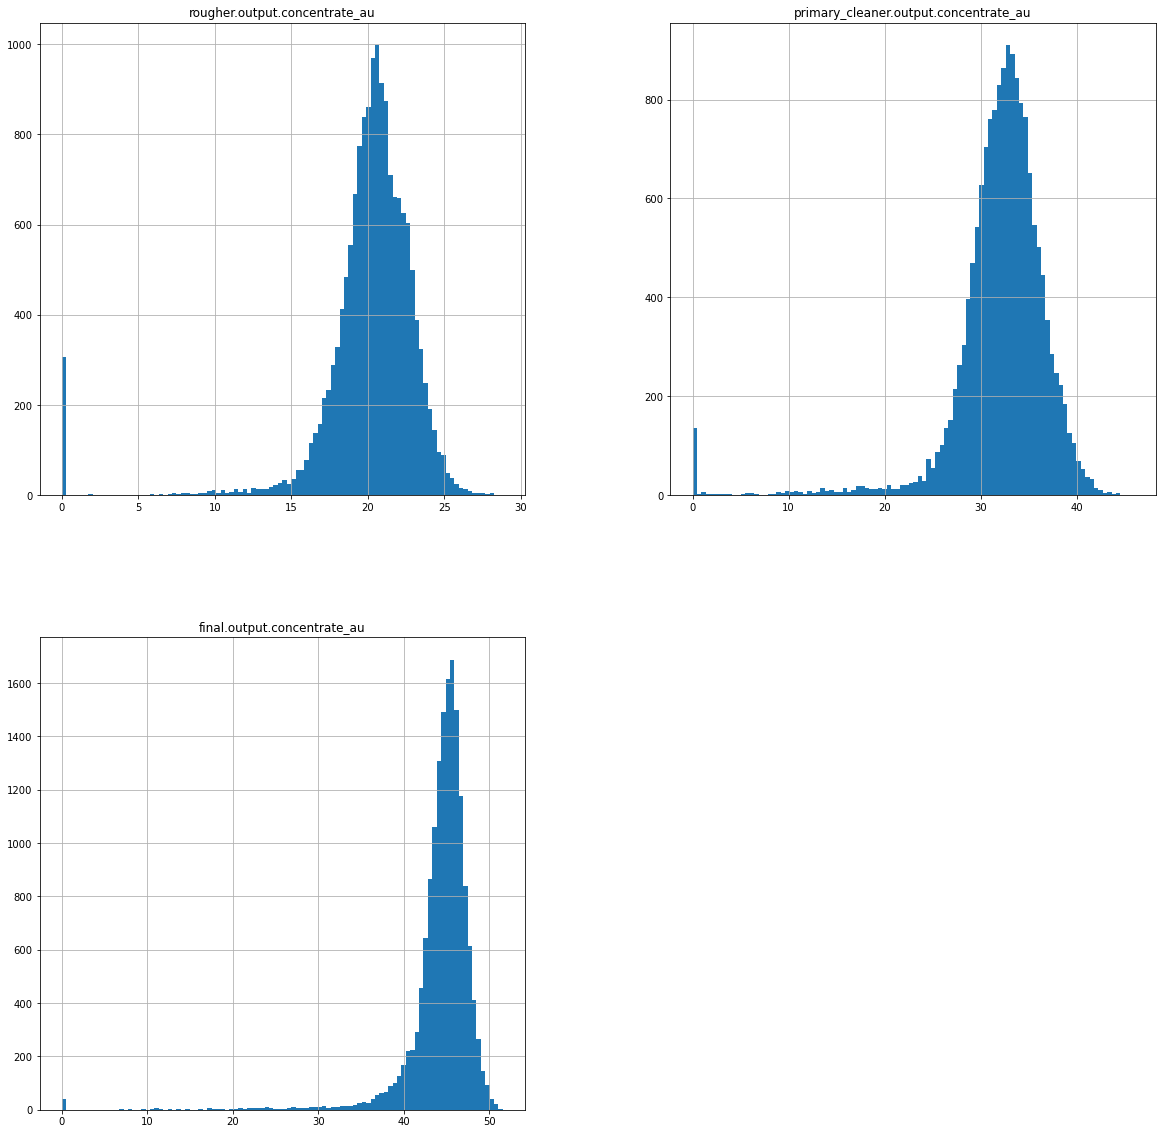

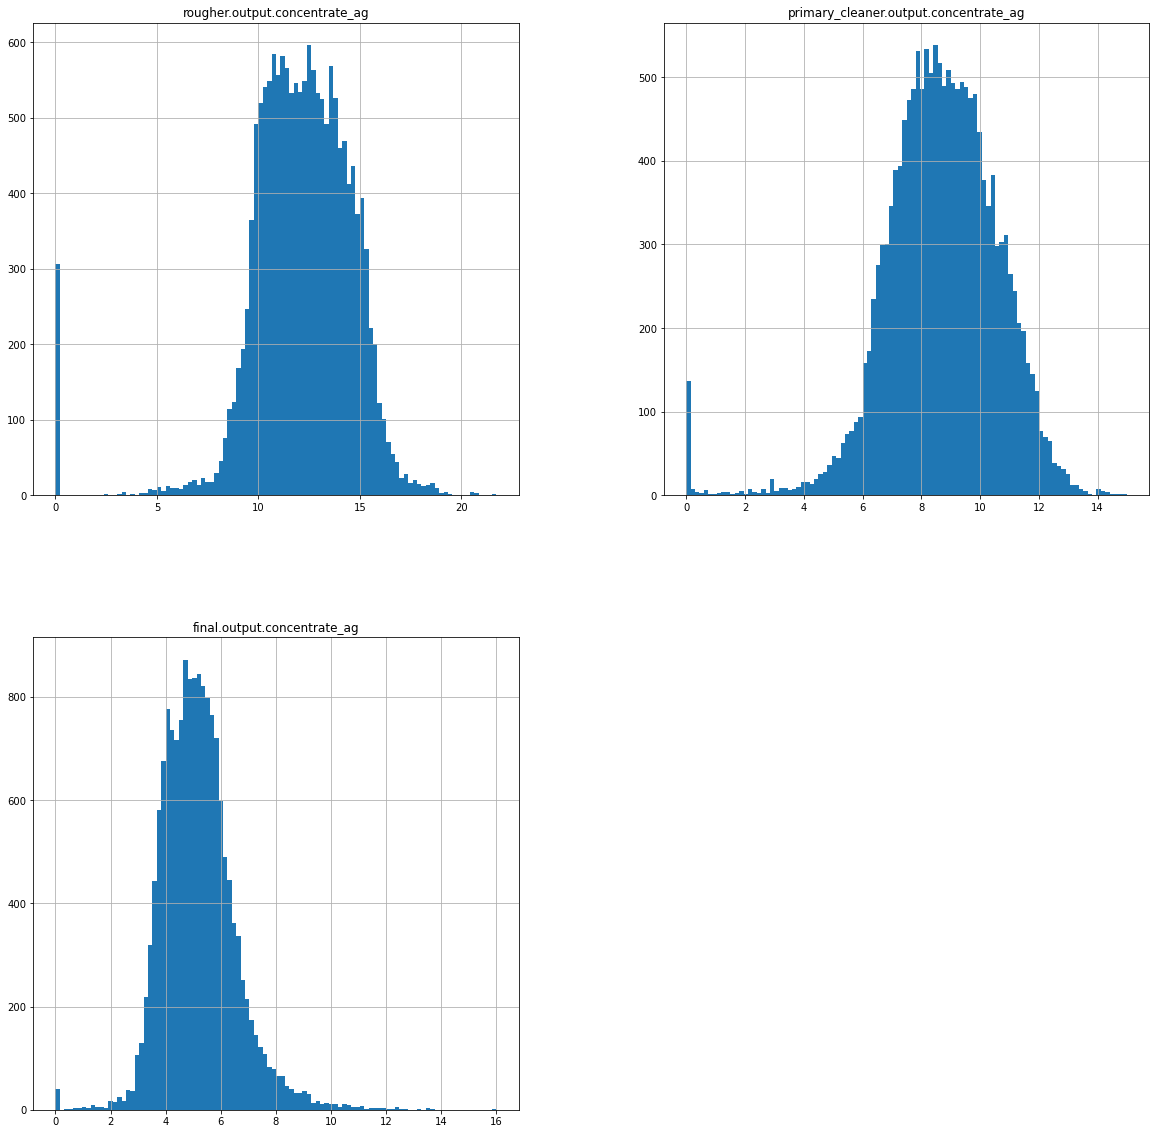

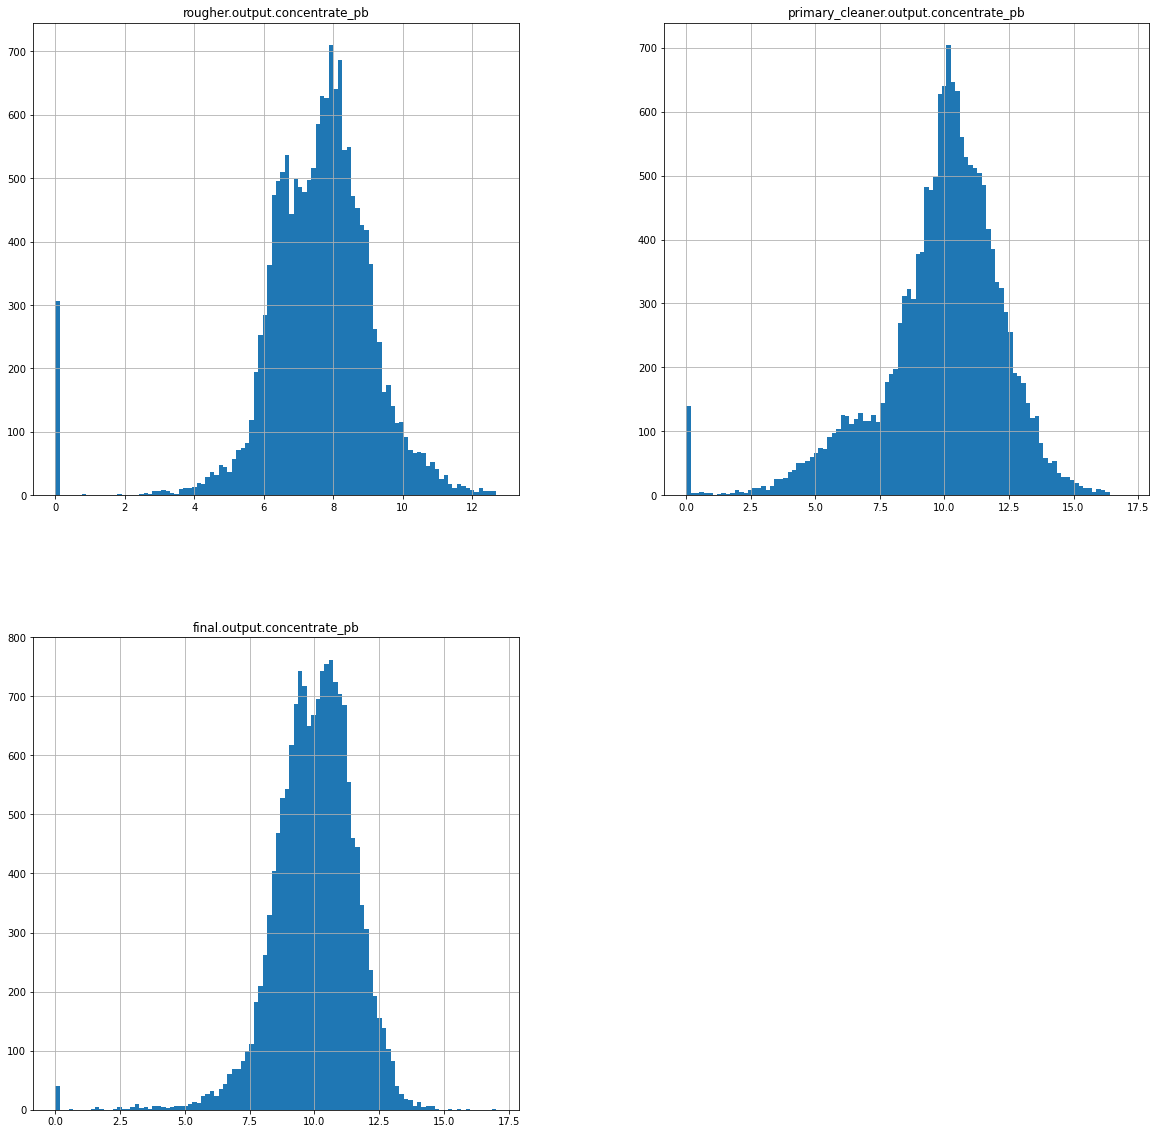

In [9]:
data_concentrate_changes_au.hist(bins = 100, figsize= [20,20]  )
data_concentrate_changes_ag.hist(bins = 100, figsize= [20,20]  )
data_concentrate_changes_pb.hist(bins = 100, figsize= [20,20]  )

#### Conclusion step 2.1:
* We get more pure gold at each stage for gold on average
* As for silver, its average distribution at each stage decreases after each stage. It is probably because of some materials which goes from ore tailing
* There are anomalous in output concentrate values near 0, which means that sometimes there are no necessary metals in the ore or emissions

### Step 2.2. Compare the size distributions of raw material granules on the training and test samples. If the distributions are very different from each other, the estimation of the model will be wrong.

<AxesSubplot:ylabel='Frequency'>

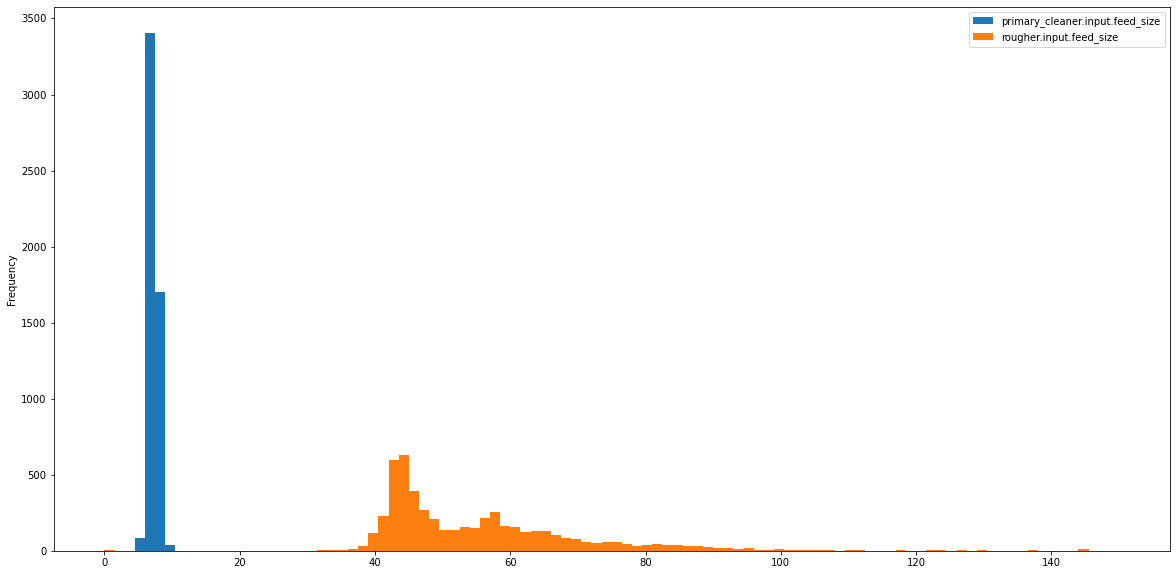

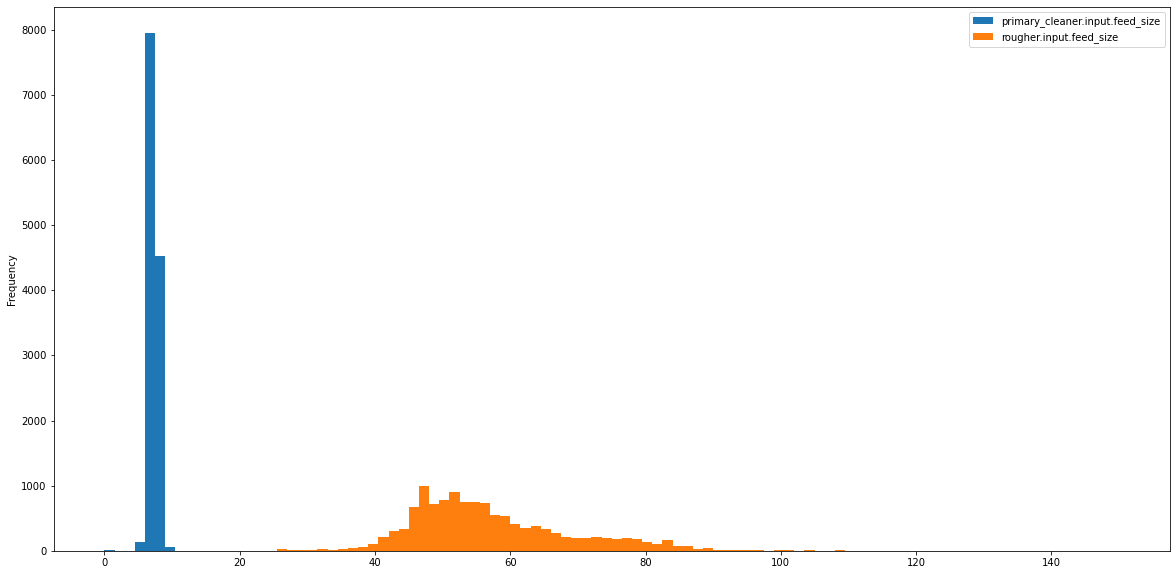

In [10]:

data_test[["primary_cleaner.input.feed_size","rougher.input.feed_size"]].plot(kind="hist",figsize= [20,10], bins = 100,
                                                                              range = (0,150)
                                                                             )

data_train[["primary_cleaner.input.feed_size","rougher.input.feed_size"]].plot(kind="hist",figsize= [20,10], bins = 100
                                                                               , range = (0,150)
                                                                              )





#### Conclusion Step 2.2:
* The graph shows that the average values of the granule size and its frequency distribution for the primary_cleaner are identical
* The value of the granules of the final stage are located in the same range, but the average values are difficult to determine from the graph


### Step 2.3. Explore the total concentration of all substances at different stages: in raw materials, in roughing and final concentrates.

In [11]:

data_sum_concentrate_rougher = 0 
data_sum_concentrate_rougher = 0 

data_sum_concentrate_rougher = (sum(data_full["rougher.output.concentrate_pb"]) +
                                sum(data_full["rougher.output.concentrate_ag"]) + 
                                sum(data_full["rougher.output.concentrate_sol"]) + 
                                sum(data_full["rougher.output.concentrate_au"])
                               )
data_sum_concentrate_primary_cleaner = (sum(data_full["primary_cleaner.output.concentrate_pb"]) + 
                                        sum(data_full["primary_cleaner.output.concentrate_ag"]) + 
                                        sum(data_full["primary_cleaner.output.concentrate_sol"]) + 
                                        sum(data_full["primary_cleaner.output.concentrate_au"])
                                       )

data_sum_concentrate_final = (sum(data_full["final.output.concentrate_pb"]) 
                              + sum(data_full["final.output.concentrate_ag"]) 
                              + sum(data_full["final.output.concentrate_sol"]) 
                              + sum(data_full["final.output.concentrate_au"])
                             )

print("The amount of concentrate after the flotation stage           ", int(data_sum_concentrate_rougher))
print("Amount of concentrate after primary treatment                 ", int(data_sum_concentrate_primary_cleaner))
print("The amount of concentrate at the final stage                  ", int(data_sum_concentrate_final))

The amount of concentrate after the flotation stage            1107360
Amount of concentrate after primary treatment                  987725
The amount of concentrate at the final stage                   1116406


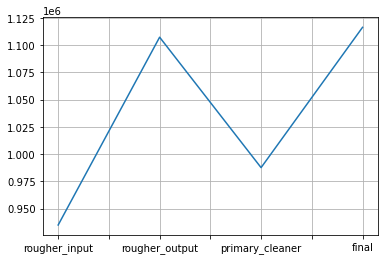

array([[<AxesSubplot:title={'center':'rougher_input'}>,
        <AxesSubplot:title={'center':'rougher_output'}>],
       [<AxesSubplot:title={'center':'primary_cleaner'}>,
        <AxesSubplot:title={'center':'final'}>]], dtype=object)

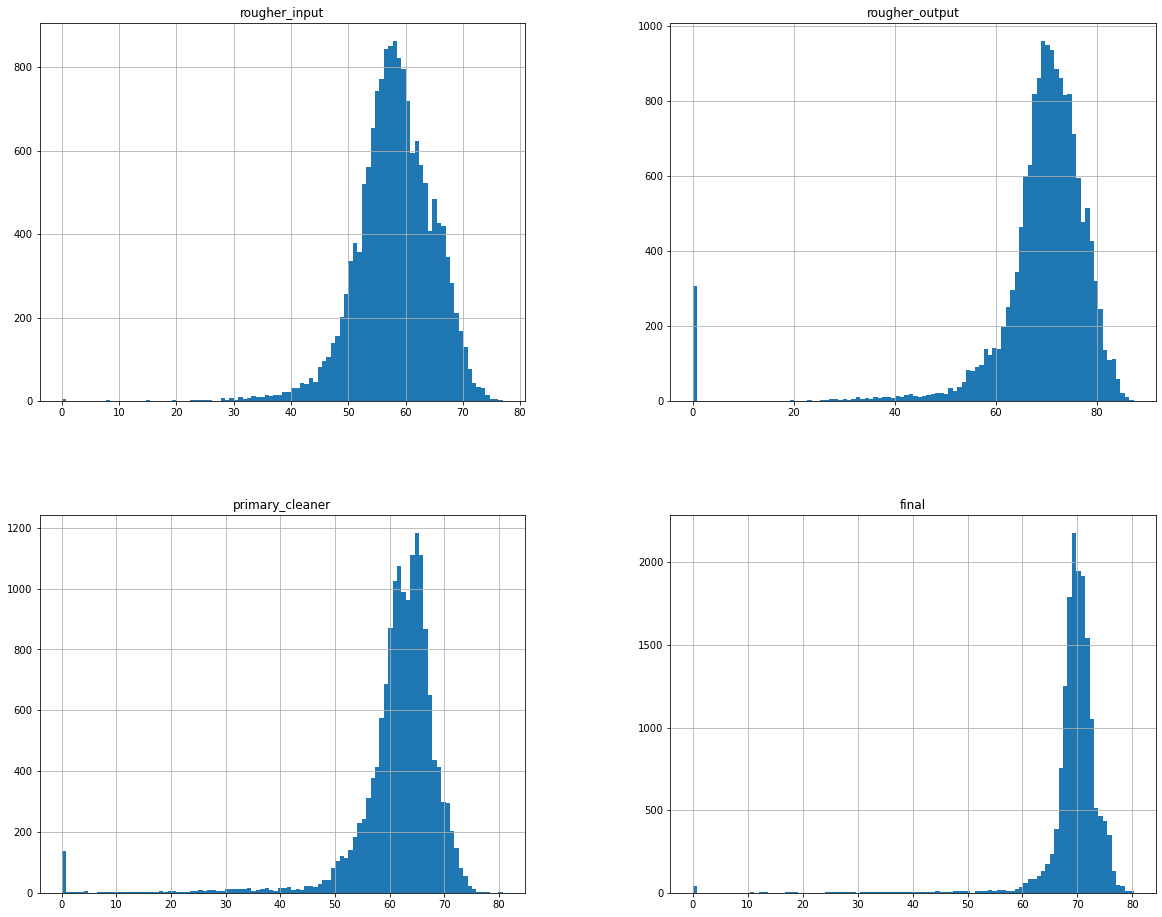

In [12]:
# let's investigate the sum of all concentrates
df_check = pd.DataFrame()

df_check["rougher_input"] = ( data_full["rougher.input.feed_pb"] 
                             + data_full["rougher.input.feed_ag"]
                             + data_full["rougher.input.feed_sol"] 
                             + data_full["rougher.input.feed_au"]
                            )
df_check["rougher_output"] = ( data_full["rougher.output.concentrate_pb"] 
                              + data_full["rougher.output.concentrate_ag"]
                              + data_full["rougher.output.concentrate_sol"] 
                              + data_full["rougher.output.concentrate_au"]
                             )

df_check["primary_cleaner"] = ( data_full["primary_cleaner.output.concentrate_pb"] 
                               + data_full["primary_cleaner.output.concentrate_ag"]
                               + data_full["primary_cleaner.output.concentrate_sol"] 
                               + data_full["primary_cleaner.output.concentrate_au"]
                              )

df_check["final"] = ( data_full["final.output.concentrate_pb"] 
                     + data_full["final.output.concentrate_ag"]
                     + data_full["final.output.concentrate_sol"] 
                     + data_full["final.output.concentrate_au"]
                    )

df_check.sum().plot(grid = True )
plt.show()

df_check.hist(bins = 100, figsize = (20,16))



In [13]:
data_full["0_rougher_input"] = ( data_full["rougher.input.feed_pb"] 
                             + data_full["rougher.input.feed_ag"]
                             + data_full["rougher.input.feed_sol"] 
                             + data_full["rougher.input.feed_au"]
                            )
data_full["0_rougher_output"] = ( data_full["rougher.output.concentrate_pb"] 
                              + data_full["rougher.output.concentrate_ag"]
                              + data_full["rougher.output.concentrate_sol"] 
                              + data_full["rougher.output.concentrate_au"]
                             )

data_full["0_primary_cleaner"] = ( data_full["primary_cleaner.output.concentrate_pb"] 
                               + data_full["primary_cleaner.output.concentrate_ag"]
                               + data_full["primary_cleaner.output.concentrate_sol"] 
                               + data_full["primary_cleaner.output.concentrate_au"]
                              )

data_full["0_final"] = ( data_full["final.output.concentrate_pb"] 
                     + data_full["final.output.concentrate_ag"]
                     + data_full["final.output.concentrate_sol"] 
                     + data_full["final.output.concentrate_au"]
                    )


df_del_0= pd.DataFrame()

df_del_0 = (data_full["date"].loc[data_full["0_rougher_input"] <10]) 
df_del_0 = df_del_0.append(data_full["date"].loc[data_full["0_rougher_output"] <10])
df_del_0 = df_del_0.append(data_full["date"].loc[data_full["0_primary_cleaner"] <10])
df_del_0 = df_del_0.append(data_full["date"].loc[data_full["0_final"] <10])
           
print(df_del_0)
df_del_0 = pd.Series(df_del_0)
print(df_del_0)

print("Number of data before cleaning 0 sum of concentrates", data_train["date"].count())

data_train = data_train.loc[~data_train['date'].isin(df_del_0)]

print("Number of data after cleaning 0 sum of concentrates", data_train["date"].count())

1066     2016-03-13 12:00:00
1648     2016-04-21 00:00:00
14359    2018-03-12 02:59:59
14360    2018-03-12 03:59:59
14361    2018-03-12 04:59:59
                ...         
12387    2017-11-01 11:59:59
12756    2017-11-18 07:59:59
12757    2017-11-18 08:59:59
13030    2017-11-30 02:59:59
13575    2017-12-26 20:59:59
Name: date, Length: 524, dtype: object
1066     2016-03-13 12:00:00
1648     2016-04-21 00:00:00
14359    2018-03-12 02:59:59
14360    2018-03-12 03:59:59
14361    2018-03-12 04:59:59
                ...         
12387    2017-11-01 11:59:59
12756    2017-11-18 07:59:59
12757    2017-11-18 08:59:59
13030    2017-11-30 02:59:59
13575    2017-12-26 20:59:59
Name: date, Length: 524, dtype: object
Number of data before cleaning 0 sum of concentrates 12679
Number of data after cleaning 0 sum of concentrates 12314


In [14]:
print("Number of values in step 0", data_train["primary_cleaner.input.sulfate"].count())
data_train = data_train[(data_train['primary_cleaner.input.sulfate'] > 25)].reset_index(drop = True)

Number of values in step 0 12314


#### Conclusion step 2.3:
* The amount of concentrates does not have a constant state: at the moment after the primary treatment, the total amount of concentrates decreases to 1.17 million units, and then again grows to 1.32 million units at the final stage
* The reason for this may be 0 values in the stages after flotation and after primary cleaning
* A value of 0 in the amount of concentrates means that nothing was served
* It is strange that the amount of concentrates is greater in the final than in the initial raw material. After all, logically, concentrates should be washed into tailings
* Perhaps this result was due to the sol indicator, which is not described somehow

## STEP 3. Build models
* 3.1. Write a function to calculate the final sMAPE
* 3.2. Train different models and evaluate their quality by cross-validation. Choose the best model and test it on a test set. Describe the findings

### Step 3.1. Write a function to calculate the final sMAPE

In [15]:
def smape_func(target,predictions):
    smape = (1/len(target)) * sum((abs(target - predictions)) / ((abs(predictions) + abs(target)+1e-10)/2) * 100 )
    return smape

In [16]:
def smape_final_and_rougher_func (sum_smape_part_final, sum_smape_part_rougher):
    
    smape = 0.25 * sum_smape_part_rougher + 0.75 * sum_smape_part_final
    
    return smape
    

In [33]:
# write a function for key model parameters

def model_key_parameters_linear_regression_func(features_train, target_train, features_valid, target_valid):
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    r2 = r2_score(target_valid, predictions)
    mse = mean_squared_error(target_valid, predictions)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(target_valid, predictions)
    mean_product = sum(predictions)/len(predictions)
    
    #print(region_string)
    print("Model", model)
    print("R2 score", r2)
    print("MSE score", mse )
    print("RMSE score", rmse)
    print("MAE score", mae )
    print("Average predicted raw material", mean_product)
    print("")
    
    return predictions, r2, mse, rmse, mae, mean_product, model

####  Conclusion step 3.1
* according to the graphs, it is not possible to say which parameters are needed to remove from the selection
* remove the date parameter, since it characterizes the parameters in the past and does not help to predict about future values
* due to the fact that we didn't recieve an explanation of all indicators, it is very difficult to say which of them affect the final result and which do not
* therefore, we will use all the parameters for training the model
* it can be assumed that subsequent stages are not needed to predict the indicators of the flotation stage, so we will not train these processes



let's Remove the time value, since it is unique and will not help in forecasting

In [18]:
data_test = data_test.drop("date", axis = 1)
data_train = data_train.drop("date", axis = 1)

#### Intermediate conclusions:
* remove anomalies from the sample for all parameters by which we will train the model
* remove values that are less than the mean - 3 standard deviations and greater than the mean + 3 standard deviations are plotted approximately according to the whisker chart
* the parameters are set poorly. In this case, many functions do not work, such as query. Names need to be changed
* not the most elegant solution, but it works. Let's think how to improve it later

* trying to take from 25% to 75% for each parameter leaves no values, so we will not cut values from the mean minus 3 standard deviations to the mean + 3 standard deviations
* When I dropped data from the mean minus 3 standard deviations to the mean + 3 standard deviations, there were 5336 values left, which we lost 57% of the values, which is unacceptable.
* As a result, the predictive smae for all functions has increased.
* I limited the values only from below - a total of 70% data remains.

### Step 3.2 Train different models and evaluate their quality by cross-validation. Choose the best model and test it on a test set. Describe the findings

Let's divide indicators into 4 types of values:
* 2 target features at the stage after flotation (rougher.output.recovery) and final (final.output.recovery)
* 2 training samples for each target feature

In [19]:
target_final_train   = data_train["final.output.recovery"]
target_rougher_train = data_train["rougher.output.recovery"]

features_final_train = data_train.drop(["final.output.recovery","rougher.output.recovery"], axis = 1)
features_rougher_train = data_train.drop(["final.output.recovery","rougher.output.recovery","primary_cleaner.input.sulfate","primary_cleaner.input.depressant","primary_cleaner.input.feed_size", "primary_cleaner.input.xanthate",'primary_cleaner.state.floatbank8_a_air','primary_cleaner.state.floatbank8_a_level','primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level','primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level','primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 'secondary_cleaner.state.floatbank2_a_air', 'secondary_cleaner.state.floatbank2_a_level','secondary_cleaner.state.floatbank2_b_air','secondary_cleaner.state.floatbank2_b_level','secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank3_a_level','secondary_cleaner.state.floatbank3_b_air','secondary_cleaner.state.floatbank3_b_level','secondary_cleaner.state.floatbank4_a_air','secondary_cleaner.state.floatbank4_a_level','secondary_cleaner.state.floatbank4_b_air', 'secondary_cleaner.state.floatbank4_b_level','secondary_cleaner.state.floatbank5_a_air','secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank5_b_air','secondary_cleaner.state.floatbank5_b_level','secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank6_a_level'], axis = 1)

target_final_test   = data_test["final.output.recovery"]
target_rougher_test = data_test["rougher.output.recovery"]

features_final_test = data_test.drop(["final.output.recovery","rougher.output.recovery"], axis = 1)
features_rougher_test = data_test.drop(["final.output.recovery","rougher.output.recovery","primary_cleaner.input.sulfate","primary_cleaner.input.depressant","primary_cleaner.input.feed_size", "primary_cleaner.input.xanthate",'primary_cleaner.state.floatbank8_a_air','primary_cleaner.state.floatbank8_a_level','primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level','primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level','primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 'secondary_cleaner.state.floatbank2_a_air', 'secondary_cleaner.state.floatbank2_a_level','secondary_cleaner.state.floatbank2_b_air','secondary_cleaner.state.floatbank2_b_level','secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank3_a_level','secondary_cleaner.state.floatbank3_b_air','secondary_cleaner.state.floatbank3_b_level','secondary_cleaner.state.floatbank4_a_air','secondary_cleaner.state.floatbank4_a_level','secondary_cleaner.state.floatbank4_b_air', 'secondary_cleaner.state.floatbank4_b_level','secondary_cleaner.state.floatbank5_a_air','secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank5_b_air','secondary_cleaner.state.floatbank5_b_level','secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank6_a_level'], axis = 1)

### Model 1: DummyRegressor


In [20]:
# We don't do GridSearch because linear regression has few hyperparameter values. Although we can experiment with the values of the strategy
model_final_dummy = DummyRegressor(strategy = "mean")
model_rougher_dummy = DummyRegressor(strategy = "mean")

# Before submitting a model for crosvalidation, it must be trained
model_final_dummy.fit(features_final_train, target_final_train )
scores_final_dummy = ( abs(cross_val_score(model_final_dummy, features_final_train, target_final_train, 
                       scoring = make_scorer(score_func = smape_func, greater_is_better = False) , cv= 5))
                      )
scores_mean_final_dummy = np.abs(scores_final_dummy.mean())
print("", scores_mean_final_dummy)


model_rougher_dummy.fit(features_rougher_train, target_rougher_train)
scores_rougher_dummy = ( abs(cross_val_score(model_rougher_dummy, features_rougher_train, target_rougher_train, 
                   scoring = make_scorer(score_func = smape_func, greater_is_better = False) , cv= 5))
                 )
scores_mean_rougher_dummy = np.abs(scores_rougher_dummy.mean())
print("", scores_mean_rougher_dummy)


smape_linear = smape_final_and_rougher_func(scores_mean_final_dummy, scores_mean_rougher_dummy)

print("Final smape", smape_linear)

 9.743866025948936
 7.6192827379024575
Final smape 9.212720203937316


### Model 2: Linear Regression

In [21]:
model_final_linear = LinearRegression()
model_rougher_linear =  LinearRegression()

model_final_linear.fit(features_final_train, target_final_train)
# but it is not necessary to make predictions, since the prediction in the cross-validation method is run inside the method predictions_final_linear = model_final_linear.predict(features_final_test)
scores_final_linear = ( abs(cross_val_score(model_final_linear, features_final_train, target_final_train, 
                        scoring = make_scorer(score_func = smape_func, greater_is_better = False) , cv= 5))
                      )
scores_mean_final_linear = np.abs(scores_final_linear.mean())
print(scores_mean_final_linear)


model_rougher_linear.fit(features_rougher_train, target_rougher_train)

scores_rougher_linear = ( abs(cross_val_score(model_rougher_linear, features_rougher_train, target_rougher_train, 
                          scoring = make_scorer(score_func = smape_func, greater_is_better = False) , cv= 5))
                        )
scores_mean_rougher_linear = np.abs(scores_rougher_linear.mean())
print(scores_mean_rougher_linear)
    
smape_result_linear = smape_final_and_rougher_func(scores_mean_final_linear, scores_mean_rougher_linear)

print("sMape Total after cross_val_score:",smape_result_linear)

10.375102611778406
6.310676391279601
sMape Total after cross_val_score: 9.358996056653705


### Model 3: Random Forest Regressor

#### Model 3 step 1.1: Calculate the hyperparameters of the smae final value for the RFR model

In [22]:
#%%time
# Let's select hyperparameters using GridsearchCV for the RFR_final model
model_final_RFR = RandomForestRegressor()
parameters = {"n_estimators": range (1,10,1), "max_depth":range (1,10,1)}

model_final_RFR.fit(features_final_train, target_final_train)
searcher_final_RFR = (GridSearchCV(model_final_RFR, parameters, 
                      scoring = make_scorer(score_func = smape_func, greater_is_better = False), 
                      error_score = "raise", cv= 5)
                     )


# ! action required to get best_params_
searcher_final_RFR.fit(features_final_train, target_final_train)
print(searcher_final_RFR)

searcher_final_RFR.best_params_


GridSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': range(1, 10)},
             scoring=make_scorer(smape_func, greater_is_better=False))


{'max_depth': 5, 'n_estimators': 9}

#### Model 3 step 1.2: Train after choosing the best hyperparameters and calculate smae final values for the RFR model

In [23]:
# we pass the values of the best parameters selected in gridsearch to the model for calculating cross-validation
model_final_RFR = RandomForestRegressor(max_depth = searcher_final_RFR.best_params_["max_depth"],
                                        n_estimators = searcher_final_RFR.best_params_['n_estimators']
                                       )

# it is mandatory to train the model before gridsearch 
model_final_RFR.fit(features_final_train, target_final_train)

# but it is not necessary to make predictions, since the prediction in the cross-validation method is launched inside the method
scores_final_RFR = ( abs(cross_val_score(model_final_RFR, features_final_train, target_final_train, 
                        scoring = make_scorer(score_func = smape_func, greater_is_better = False) , cv= 5))
                      )
scores_mean_final_RFR = np.abs(scores_final_RFR.mean())
print("smae final RFR", scores_mean_final_RFR)

smae final RFR 9.196801096039405


#### Model 3 step 2.1: We calculate the hyperparameters of the value of smack rougher for the model AS

In [24]:
#%%time
# Let's select hyperparameters using GridsearchCV for the RFR_final model
model_rougher_RFR = RandomForestRegressor()
parameters = {"n_estimators": range (1,10,1), "max_depth":range (1,10,1)}

model_rougher_RFR.fit(features_rougher_train, target_rougher_train)
searcher_rougher_RFR = (GridSearchCV(model_rougher_RFR, parameters, 
                        scoring = make_scorer(score_func = smape_func, greater_is_better = False),
                        error_score = "raise", cv= 5 )
                       )

searcher_rougher_RFR.fit(features_rougher_train, target_rougher_train)
print(searcher_rougher_RFR)

searcher_rougher_RFR.best_params_


GridSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': range(1, 10)},
             scoring=make_scorer(smape_func, greater_is_better=False))


{'max_depth': 6, 'n_estimators': 5}

#### Model 3 step 2.2: Train after choosing the best hyperparameters and calculate the smae rougher values for the RFR model

In [25]:
# we pass the values of the best parameters selected in gridsearch to the model for calculating cross-validation
model_rougher_RFR = RandomForestRegressor(max_depth = searcher_rougher_RFR.best_params_["max_depth"],
                                          n_estimators = searcher_rougher_RFR.best_params_['n_estimators']
                                         )

model_rougher_RFR.fit(features_rougher_train, target_rougher_train)

scores_rougher_RFR = ( abs(cross_val_score(model_rougher_RFR, features_rougher_train, target_rougher_train, 
                        scoring = make_scorer(score_func = smape_func, greater_is_better = False), cv= 5))
                      )
scores_mean_rougher_RFR = np.abs(scores_rougher_RFR.mean())
print("smae rougher RFR", scores_mean_rougher_RFR)

smae rougher RFR 6.168427987880085


#### Model 3 step 3: Final smae value for the RFR model on the test set

In [26]:
smape_RFR = smape_final_and_rougher_func(scores_mean_final_RFR ,scores_mean_rougher_RFR )
print("Final smape RFR", smape_RFR)

Final smape RFR 8.439707818999574


### Model 4 DecisionTreeRegressor

#### Model 4 step 1.2: Train after choosing the best hyperparameters and calculate smae final values for the DTR model

In [27]:
model_final_DTR = DecisionTreeRegressor()
parameters = {"max_depth" : range (1,11)}

model_final_DTR.fit(features_final_train, target_final_train)
searcher_final_DTR = (GridSearchCV(model_final_DTR, parameters, 
                      scoring = make_scorer(score_func = smape_func, greater_is_better = False), 
                      error_score = "raise", cv= 5 )
                     )

searcher_final_DTR.fit(features_final_train, target_final_train)
print(searcher_final_DTR)

searcher_final_DTR.best_params_


GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 11)},
             scoring=make_scorer(smape_func, greater_is_better=False))


{'max_depth': 1}

#### Model 4 step 1.2: Train after choosing the best hyperparameters and calculate smae final values for the DTR model

In [28]:

model_final_DTR = DecisionTreeRegressor(max_depth = searcher_final_DTR.best_params_["max_depth"])

model_final_DTR.fit(features_final_train, target_final_train)

scores_final_DTR = ( abs(cross_val_score(model_final_DTR, features_final_train, target_final_train, 
                        scoring = make_scorer(score_func = smape_func, greater_is_better = False) , cv= 5))
                    )
scores_mean_final_DTR = np.abs(scores_final_DTR.mean())
print("smae final DTR", scores_mean_final_DTR)

smae final DTR 8.943756893212285


#### Model 4 step 2.1: Calculate the hyperparameters of the sMAE rougher value for the DTR model

In [29]:
#%%time
# for the RFR_final model, we select hyperparameters using GridsearchCV
model_rougher_DTR = DecisionTreeRegressor()
parameters = {"max_depth" : range (1,11)}


model_rougher_DTR.fit(features_rougher_train, target_rougher_train)
searcher_rougher_DTR = (GridSearchCV(model_rougher_DTR, parameters, 
                        scoring = make_scorer(score_func = smape_func, greater_is_better = False),
                        error_score = "raise", cv= 5 )
                       )

searcher_rougher_DTR.fit(features_rougher_train, target_rougher_train)
print(searcher_rougher_DTR)
searcher_rougher_DTR.best_params_


GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 11)},
             scoring=make_scorer(smape_func, greater_is_better=False))


{'max_depth': 4}

#### Model 4 Step 2.2: Train after choosing the best hyperparameters and calculate the sMAE rougher values for the DTR model

In [30]:
#I pass the values of the best parameters selected in gridsearch to the model for calculating cross-validation
model_rougher_DTR = DecisionTreeRegressor(max_depth = searcher_rougher_RFR.best_params_["max_depth"])

model_rougher_DTR.fit(features_rougher_train, target_rougher_train)

scores_rougher_DTR = ( abs(cross_val_score(model_rougher_DTR, features_rougher_train, target_rougher_train, 
                        scoring = make_scorer(score_func = smape_func, greater_is_better = False), cv= 5))
                      )
scores_mean_rougher_DTR = np.abs(scores_rougher_DTR.mean())
print("smae rougher DTR", scores_mean_rougher_DTR)

smae rougher DTR 7.1315029343643745


#### Model 4 Step 3: The final value of smae for the DTR model

In [31]:
smape_DTR = smape_final_and_rougher_func(scores_mean_final_DTR ,scores_mean_rougher_DTR )
print("Final smape DTR", smape_DTR)

Final smape DTR 8.490693403500307


#### Check the model on the test data

In [32]:
predictions_final_RFR = model_final_RFR.predict(features_final_test)
predictions_rougher_RFR = model_rougher_RFR.predict(features_rougher_test)

smape_final_test = smape_func(target_final_test,predictions_final_RFR)
smape_rougher_test = smape_func(target_rougher_test,predictions_rougher_RFR)


smape_test = smape_final_and_rougher_func(smape_final_test,smape_rougher_test)
print("Final smape score on test data ",smape_test )

Final smape score on test data  9.347486139069353


### Conclusion step 3:
* The best prediction model is model 3 Random Forest Regressor with sMape = 8.439707818999574 and sMape on test data = 9.347486139069353

## General conclusion of the project:

* The best prediction model is model 3 Random Forest Regressor with sMape = 8.439707818999574 and sMape on test data = 9.347486139069353

* In >50% the cases, the Recovery indicator is not calculated accurately
* But the average deviation of the calculated value from that already calculated in the dataframe has a difference of e-16 degrees, which is insignificant
* The MAE indicator is also insignificant
* We won't delete the missing data and fill it up with averages
* it is impossible to determine the reasons for skipping data, so we will remove the empty values in test and train with mean parameters. It is necessary to calculate the exact number of gaps 
* The graph shows that the average values of the granule size and its frequency distribution for the primary_cleaner are identical
* The value of the granules of the final stage are located in the same range, but the average values are difficult to determine from the graph
* The amount of concentrates does not have a constant state: at the moment after the primary treatment, the total amount of concentrates decreases to 1.17 million units, and then again grows to 1.32 million units at the final stage
* The reason for this may be 0 values in the stages after flotation and after primary cleaning
* A value of 0 in the amount of concentrates means that nothing was served
* It is strange that the amount of concentrates is greater in the final than in the initial raw material. After all, logically, concentrates should be washed into tailings
* Perhaps this result was due to the sol indicator, which is not described somehow
